# Linear Regression - Simple

This example demonstrates a very simple linear regression model. Looking at the data you can see a clear linear relationship between the x and y columns. Altering the learning rate, tolerance parameters and max iterations variables will affect accuracy quite a bit.

## Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
from ml.linear import LinearRegressionModel
from ml.regularization import PassThruRegularization


## Create Data

In [2]:
target = 'y'
features = ['x']
data = pd.DataFrame(
    data=list(zip(np.linspace(1, 10, 10),
                  np.linspace(4, 22, 10))), columns=['x', 'y'])
test = pd.DataFrame(
    data=list(zip(np.linspace(11, 14, 4), 
                  np.linspace(24, 30, 4))), columns=['x', 'y'])

## Build and Tune the Model

In [3]:
model = LinearRegressionModel()
model.regularization = PassThruRegularization()
model.max_iterations = 150
model.optimization.learning_rate = 0.05
model.optimization.tolerance = 1.0
model.learn(data[features].values, data[target].values)

## Make Predictions

In [4]:
ones = np.ones([test.shape[0], 1])
t = np.concatenate([ones, test[features]], axis=1)
predictions = model.predict(t)
print(predictions)

[ 24.08947962  26.12906693  28.16865423  30.20824153]


## Visualize the Fit

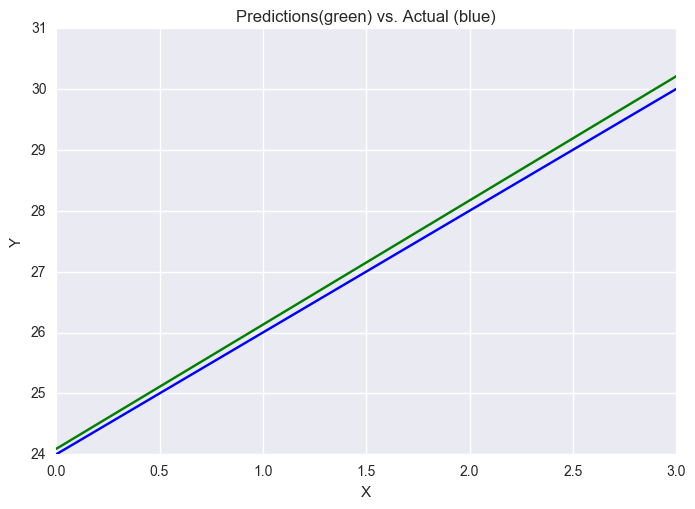

In [5]:
title('Predictions(green) vs. Actual (blue)')
ylabel('Y')
xlabel('X')
plot(predictions, 'g-', test['y'], 'b-')

## Cost Function

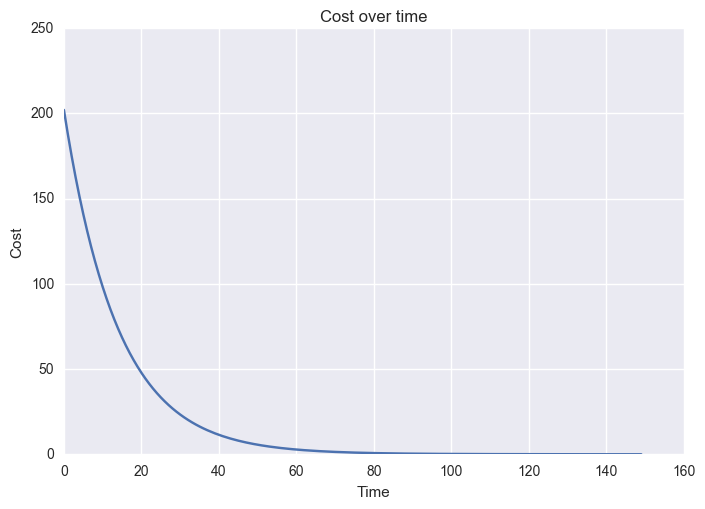

In [6]:
title('Cost over time')
ylabel('Cost')
xlabel('Time')
plot(model.cost_over_time)

## Inspect Model Params

In [7]:
print(model.params)

[ 1.65401929  2.0395873 ]
